# Music Recommendation System 

`Author:` [Prashant Sharma](https://github.com/Prashantpq)\
`Date:` 03.December.2024\
`Dataset:` [Spotify Million Song Dataset](https://www.kaggle.com/datasets/notshrirang/spotify-million-song-dataset)

### About Dataset (Meta data)
#### Context
This is Spotify Million Song Dataset. This dataset contains song names, artists names, link to the song and lyrics. This dataset can be used for recommending songs, classifying or clustering songs.

### Content
#### Column Descriptions:
* `artists:` The artists names who performed the track.
* `song:` The name of the song.
* `link:` The link of the song.
* `text:` The text or lyrics that song contain. 

# `Import Libraries`

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px
import nltk
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# `Load Dataset`

In [38]:
df = pd.read_csv('Data/spotify_millsongdata.csv')
df.head(10)

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...
5,ABBA,Burning My Bridges,/a/abba/burning+my+bridges_20003011.html,"Well, you hoot and you holler and you make me ..."
6,ABBA,Cassandra,/a/abba/cassandra_20002811.html,Down in the street they're all singing and sho...
7,ABBA,Chiquitita,/a/abba/chiquitita_20002978.html,"Chiquitita, tell me what's wrong \r\nYou're e..."
8,ABBA,Crazy World,/a/abba/crazy+world_20003013.html,I was out with the morning sun \r\nCouldn't s...
9,ABBA,Crying Over You,/a/abba/crying+over+you_20177611.html,I'm waitin' for you baby \r\nI'm sitting all ...


# `Data Exploration and Preprocessing`

In [39]:
df.shape

(57650, 4)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57650 entries, 0 to 57649
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  57650 non-null  object
 1   song    57650 non-null  object
 2   link    57650 non-null  object
 3   text    57650 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [41]:
df.isnull().sum()

artist    0
song      0
link      0
text      0
dtype: int64

In [42]:
df =df.sample(5000).drop('link', axis=1).reset_index(drop=True)

`As there was no use of link column in the dataset so we have removed it`

In [43]:
df.head(10)

,artist,song,text
0,Janis Joplin,"Oh, Sweet Mary","Yeah! \r\n \r\nOh, sweet Mary, child of conf..."
1,Our Lady Peace,Gravity,Last time I talked to you \r\nYou were lonely...
2,Vonda Shepard,What Are You Doing New Year's Eve,Maybe it's much too early in the game \r\nOoh...
3,Pat Benatar,Tell Me,Why do I have these thoughts go through my hea...
4,Red Hot Chili Peppers,Lovin' And Touchin',Loving and touching and \r\nLaughing and Sque...
5,Usher,Slow Love,Get em up get em up get em up \r\nCome on com...
6,Lynyrd Skynyrd,Gone Fishin',The only time I'll get up early \r\nIs to mee...
7,Pearl Jam,Come Back,If I keep holding out \r\nWill the light shin...
8,Vince Gill,Down To New Orleans,Hey Creole Darlin' \r\nTalk that French to me...
9,Beach Boys,I Do Love You,When you say you do \r\nMakes me want to spen...


In [44]:
df.shape

(5000, 3)

# `Exploratory Data Analysis (EDA)`

`Analysis of Artist Column`

In [45]:
artist_track_counts= df['artist'].value_counts().head(10)

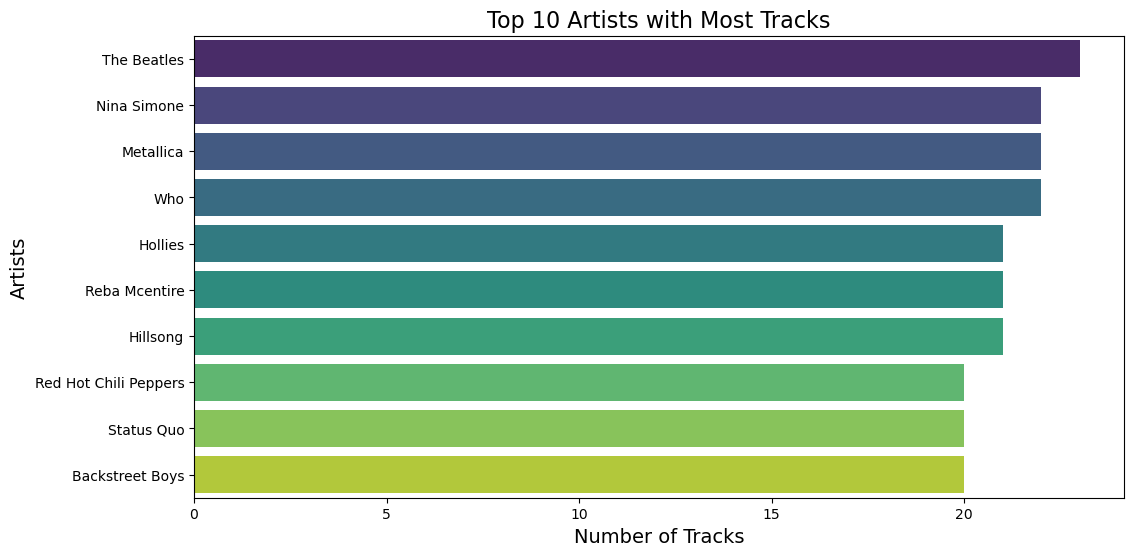

In [46]:
# Plot the top 10 artists with the most tracks
plt.figure(figsize=(12, 6))
sns.barplot(x=artist_track_counts.values, y=artist_track_counts.index, palette="viridis")
plt.title("Top 10 Artists with Most Tracks", fontsize=16)
plt.xlabel("Number of Tracks", fontsize=14)
plt.ylabel("Artists", fontsize=14)
plt.show()

In [47]:
artist_track_counts

artist
The Beatles              23
Nina Simone              22
Metallica                22
Who                      22
Hollies                  21
Reba Mcentire            21
Hillsong                 21
Red Hot Chili Peppers    20
Status Quo               20
Backstreet Boys          20
Name: count, dtype: int64

# `Text Column Cleaning and Preprocessing`

In [48]:
df['text'][0]

"Yeah!  \r\n  \r\nOh, sweet Mary, child of confusion, she runs the hills to cry  \r\nPast the willows or an illusion, Lord, tell me the reason why.  \r\nTell me why, why is it all so hard ?  \r\nBreathing in the air Breathe in the air  \r\nAnyone to care.  \r\nOh!  \r\n  \r\n(Alright, yeah!)  \r\n  \r\nOh, sweet Mary, in our story, have we nothing left to give ?  \r\nBut don't we all know, babe, if we're pressed to, that that's the way we live.  \r\nTell me why, why is it all so hard ?  \r\nBreathing in the air Breathing in the air  \r\nAnyone to care, oh, yeah!  \r\n  \r\nHop now, hop now, hop now, hop now, hop now, hop now,  \r\nHop now, hop now, hop now, hop now, hop now, hop now, whoa, yeah!\r\n\r\n"

In [49]:
df = df.sample(5000)

In [50]:
df.shape

(5000, 3)

In [51]:
df['text'] = df['text'].str.lower().replace(r'^\w\s', ' ').replace(r'\n', ' ', regex = True)

`Making text into lower case and replacing unnecessary letters and forward slash with space`

# `Tokenization`

In [52]:
stemmer = PorterStemmer()

def tokenization(txt):
    tokens = nltk.word_tokenize(txt)
    stemming = [stemmer.stem(w) for w in tokens]
    return " ".join(stemming)

In [53]:
df['text'] = df['text'].apply(lambda x: tokenization(x))

In [54]:
df['text']

3693    i 'm flyin ' high but i 've got a feelin ' i '...
2483    sweet 17 in summertim drunk on elderberri wine...
248     we 're just goin ' through the motion of the p...
4087    ( harrison ) whi are you still cri your pain i...
1252    hear the merri laugh of children , hear the ch...
                              ...                        
345     oh my darl , i miss you so . how i love you , ...
1386    alright now dig thi trash , babi you do n't ca...
2638    well it wa all that i could do to keep from cr...
1782    sit here all alon watch the snow fall look bac...
4288    when i come home , it 's late , i feel so all ...
Name: text, Length: 5000, dtype: object

# `Vectorizer and Similarity`

In [55]:
tfidvector = TfidfVectorizer(analyzer='word',stop_words='english')
matrix = tfidvector.fit_transform(df['text'])
similarity = cosine_similarity(matrix)

In [70]:
similarity[0]

array([1.        , 0.01548097, 0.10816507, ..., 0.02813117, 0.02230094,
       0.00486412])

# `Recommendation System`

In [72]:
def recommendation(song_df):
    idx = df[df['song'] == song_df].index[0]
    distances = sorted(list(enumerate(similarity[idx])),reverse=True,key=lambda x:x[1])
    
    songs = []
    for m_id in distances[1:6]:
        songs.append(df.iloc[m_id[0]].song)
        
    return songs

In [81]:
recommendation('Girls Like You')

["A Hard Rain's Gonna Fall",
 'Our Father',
 'Love In Time',
 'Shine',
 'So In Love']

In [75]:
import pickle
pickle.dump(similarity,open('model.pkl','wb'))
pickle.dump(df,open('df.pkl','wb'))